In [1]:
print("start")

start


In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train_dataset.csv')


In [3]:
df

,title,skills
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
547,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
548,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
549,Testing,â¢ Good logical and analytical skills â¢ Pos...
550,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."


In [4]:
df['title'].unique()


array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

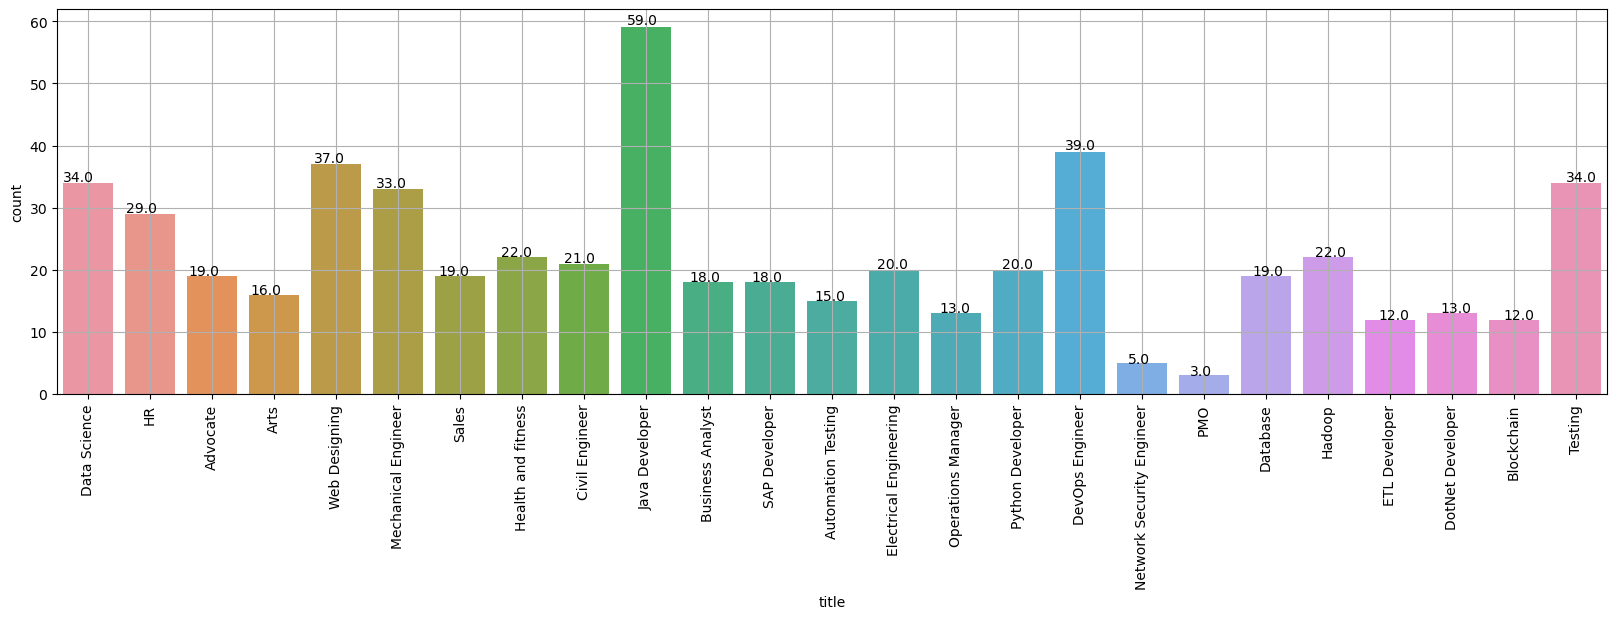

In [5]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="title", data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

In [6]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText) 
    resumeText = re.sub('RT|cc', ' ', resumeText)  
    resumeText = re.sub('#\S+', '', resumeText) 
    resumeText = re.sub('@\S+', '  ', resumeText) 
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText) 
    return resumeText
    
df['cleaned_resume'] = df.skills.apply(lambda x: cleanResume(x))
df

,title,skills,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
547,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
548,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
549,Testing,â¢ Good logical and analytical skills â¢ Pos...,Good logical and analytical skills Positive a...
550,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...


In [7]:
import nltk
from nltk.corpus import stopwords
import string



In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')

In [9]:
x = df['skills'].values
y = df['title'].values

In [10]:

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score

In [11]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score

In [12]:
class StemTokenizer:
  def __init__(self):
    self.porter = PorterStemmer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    return [self.porter.stem(t) for t in tokens]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=50, test_size=0.30,stratify=y)
x_train.shape, x_test.shape


((386,), (166,))

In [14]:
vectorizer = CountVectorizer(stop_words='english')
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [15]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.93
Accuracy of  test set    : 0.87
Classification report for classifier KNeighborsClassifier(n_neighbors=3):
                           precision    recall  f1-score   support

                 Advocate       0.50      0.83      0.62         6
                     Arts       1.00      0.60      0.75         5
       Automation Testing       0.67      0.50      0.57         4
               Blockchain       1.00      1.00      1.00         3
         Business Analyst       0.80      0.80      0.80         5
           Civil Engineer       0.75      1.00      0.86         6
             Data Science       0.71      1.00      0.83        10
                 Database       1.00      0.67      0.80         6
          DevOps Engineer       0.91      0.83      0.87        12
         DotNet Developer       1.00      0.75      0.86         4
            ETL Developer       1.00      1.00      1.00         4
   Electrical Engineering       1.00      0.83      0.91 

In [23]:



RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)

print('Accuracy of training set : {:.2f}'.format(RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(RF.score(x_test, y_test)))

print("Classification report for classifier %s:\n%s\n" % (RF,classification_report(y_test, y_pred)))
nb_score = RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.91
Classification report for classifier RandomForestClassifier():
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         6
                     Arts       1.00      1.00      1.00         5
       Automation Testing       1.00      0.75      0.86         4
               Blockchain       1.00      0.67      0.80         3
         Business Analyst       0.83      1.00      0.91         5
           Civil Engineer       1.00      1.00      1.00         6
             Data Science       0.77      1.00      0.87        10
                 Database       1.00      0.83      0.91         6
          DevOps Engineer       1.00      0.92      0.96        12
         DotNet Developer       1.00      0.75      0.86         4
            ETL Developer       1.00      1.00      1.00         4
   Electrical Engineering       0.83      0.83      0.83         6
 

In [24]:
df1=pd.read_csv('extract.csv')
new_resume = df1['skills'].values
new_resume_vectorized = vectorizer.transform(new_resume)
prediction_new_resume = RF.predict(new_resume_vectorized)

print("Prediction for the new resume:", prediction_new_resume)

Prediction for the new resume: ['Java Developer' 'Data Science' 'HR' 'Business Analyst' 'Java Developer'
 'Java Developer' 'Business Analyst' 'Java Developer' 'Business Analyst'
 'Java Developer' 'Data Science' 'Mechanical Engineer' 'Business Analyst'
 'Business Analyst' 'Business Analyst' 'Hadoop' 'HR' 'HR' 'HR'
 'Civil Engineer' 'Civil Engineer' 'Civil Engineer' 'Data Science'
 'Data Science' 'HR' 'Data Science' 'Data Science' 'Database'
 'Mechanical Engineer' 'HR' 'Data Science' 'Data Science' 'HR' 'HR'
 'Data Science' 'HR' 'HR' 'Mechanical Engineer' 'HR' 'Data Science'
 'Data Science' 'Java Developer' 'Java Developer' 'Java Developer'
 'Java Developer' 'Java Developer' 'Java Developer' 'Java Developer'
 'Data Science' 'Java Developer' 'Data Science' 'Advocate'
 'Java Developer' 'Business Analyst' 'Java Developer' 'Java Developer'
 'Java Developer' 'Business Analyst' 'Java Developer' 'Business Analyst'
 'Hadoop' 'Java Developer' 'Java Developer' 'Java Developer'
 'Mechanical Enginee

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
df1['Category related ']=prediction_new_resume

job_description = '''
Job Title: Data Scientist

Experience Range: 5- 8 Years

Location: Pan India

Must-Have:
• Utilize exploratory analysis techniques to derive valuable business insights and enhance overall value from large datasets.
• Demonstrate expertise in Natural Language Processing (NLP), Information Extraction, and Text Mining algorithms.
• Possess a strong familiarity with Deep Learning methods for text analytics, including RNN, LSTM, Word2Vec, and other embeddings, as well as proficiency in Keras/Tensorflow and PyTorch.
• Showcase expert-level knowledge in various Machine Learning algorithms, such as Linear and Logistic Regression, SVM, Random Forest, Bayesian Methods, Unsupervised Learning, Reinforcement Learning, Online Learning, and XGBoost.
• Ability to develop AI models using Large Language Models (LLM) from diverse data sources, utilizing Knowledge Graphs effectively.
• Proficiency in programming languages like Python, R, SQL, and PySpark'''


documents = [job_description] + list(df1['skills'])

vectorizer1 = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer1.fit_transform(documents)

# Calculate cosine similarity
cosine_similarities = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1:]).flatten()

# Add the similarity scores to the DataFrame
df1['similarity_score'] = cosine_similarities
resumes_df = df1.sort_values(by='similarity_score', ascending=False)
resumes_df.to_csv('tcs_with_scores.csv', index=False)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.92
Accuracy of training set : 0.36
Accuracy of  test set    : 0.36
Accuracy of training set : 0.15
Accuracy of  test set    : 0.15
Accuracy of training set : 0.26
Accuracy of  test set    : 0.25
Accuracy of training set : 1.00
Accuracy of  test set    : 0.92
Accuracy of training set : 0.45
Accuracy of  test set    : 0.39
Accuracy of training set : 0.46
Accuracy of  test set    : 0.44
Accuracy of training set : 0.64
Accuracy of  test set    : 0.55
Accuracy of training set : 1.00
Accuracy of  test set    : 0.92
Accuracy of training set : 0.49
Accuracy of  test set    : 0.42
Accuracy of training set : 0.72
Accuracy of  test set    : 0.67
Accuracy of training set : 0.77
Accuracy of  test set    : 0.69
Accuracy of training set : 1.00
Accuracy of  test set    : 0.92
Accuracy of training set : 0.57
Accuracy of  test set    : 0.46
Accuracy of training set : 0.77
Accuracy of  test set    : 0.71
Accuracy of training set : 0.87
Accuracy

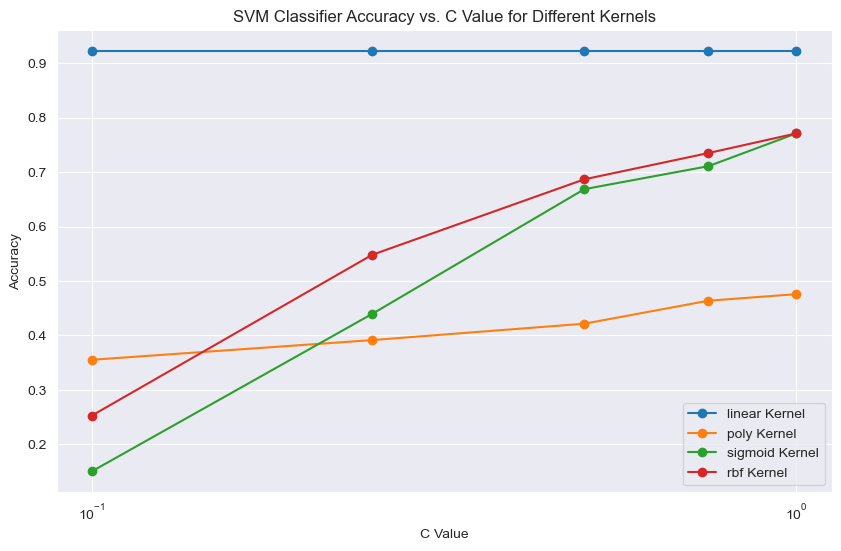

Accuracy of training set : 0.90
Accuracy of  test set    : 0.77
Classification report for classifier SVC(C=1):
                           precision    recall  f1-score   support

                 Advocate       0.00      0.00      0.00         6
                     Arts       1.00      0.20      0.33         5
       Automation Testing       1.00      0.50      0.67         4
               Blockchain       1.00      0.67      0.80         3
         Business Analyst       0.71      1.00      0.83         5
           Civil Engineer       1.00      1.00      1.00         6
             Data Science       0.67      1.00      0.80        10
                 Database       0.83      0.83      0.83         6
          DevOps Engineer       0.83      0.83      0.83        12
         DotNet Developer       1.00      0.25      0.40         4
            ETL Developer       1.00      1.00      1.00         4
   Electrical Engineering       1.00      0.33      0.50         6
                 

In [89]:
C_values = [ 0.1,0.25,0.5,0.75, 1]
import numpy as np
import matplotlib.pyplot as plt
# Create a dictionary to store the results for each kernel type
kernel_results = {'linear': [], 'poly': [], 'sigmoid': [], 'rbf': []}
for C in C_values:
    for kernel in ['linear', 'poly', 'sigmoid', 'rbf']:
        if kernel == 'poly':
            model_svm = SVC(C=C, kernel=kernel, degree=3)  # Polynomial kernel with degree 3
        else:
            model_svm = SVC(C=C, kernel=kernel)


        model_svm.fit(x_train, y_train)
        y_pred = model_svm.predict(x_test)
        accuracy_svm = accuracy_score(y_test, y_pred)
        print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
        print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
        
        kernel_results[kernel].append(accuracy_svm)
plt.figure(figsize=(10, 6))
for kernel in kernel_results.keys():
    plt.plot(C_values, kernel_results[kernel], marker='o', label=f'{kernel} Kernel')

plt.xscale('log')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('SVM Classifier Accuracy vs. C Value for Different Kernels')
plt.legend()
plt.grid(True)
plt.show()






print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.17
Accuracy of  test set    : 0.18
Accuracy of training set : 0.25
Accuracy of  test set    : 0.27
Accuracy of training set : 0.33
Accuracy of  test set    : 0.36
Accuracy of training set : 0.39
Accuracy of  test set    : 0.40
Accuracy of training set : 0.45
Accuracy of  test set    : 0.46
Accuracy of training set : 0.54
Accuracy of  test set    : 0.55
Accuracy of training set : 0.64
Accuracy of  test set    : 0.64
Accuracy of training set : 0.73
Accuracy of  test set    : 0.69
Accuracy of training set : 0.78
Accuracy of  test set    : 0.73
Accuracy of training set : 0.82
Accuracy of  test set    : 0.76
Accuracy of training set : 0.85
Accuracy of  test set    : 0.79
Accuracy of training set : 0.89
Accuracy of  test set    : 0.82
Accuracy of training set : 0.91
Accuracy of  test set    : 0.84
Accuracy of training set : 0.93
Accuracy of  test set    : 0.85
Accuracy of training set : 0.95
Accuracy of  test set    : 0.87
Accuracy of training set : 0.97
Accuracy

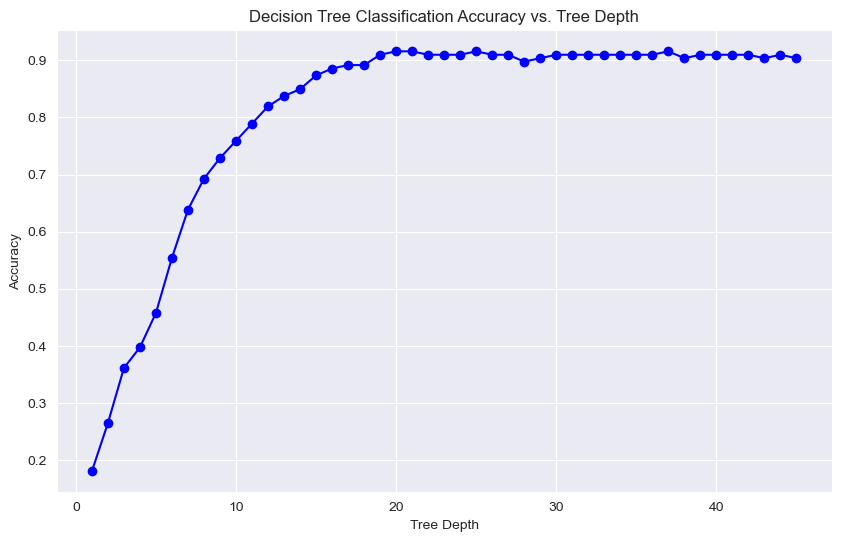

In [90]:
depths = []
accuracies = []
for depth in range(1, 46):
    model_DT = DecisionTreeClassifier(max_depth=depth)
    model_DT.fit(x_train, y_train)
    y_pred = model_DT.predict(x_test)
    accuracy_DT = accuracy_score(y_test, y_pred)
    
    print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
    print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
    depths.append(depth)
    accuracies.append(accuracy_DT)

print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.title('Decision Tree Classification Accuracy vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.83
Accuracy of  test set    : 0.73
Accuracy of training set : 0.99
Accuracy of  test set    : 0.92
Accuracy of training set : 1.00
Accuracy of  test set    : 0.92


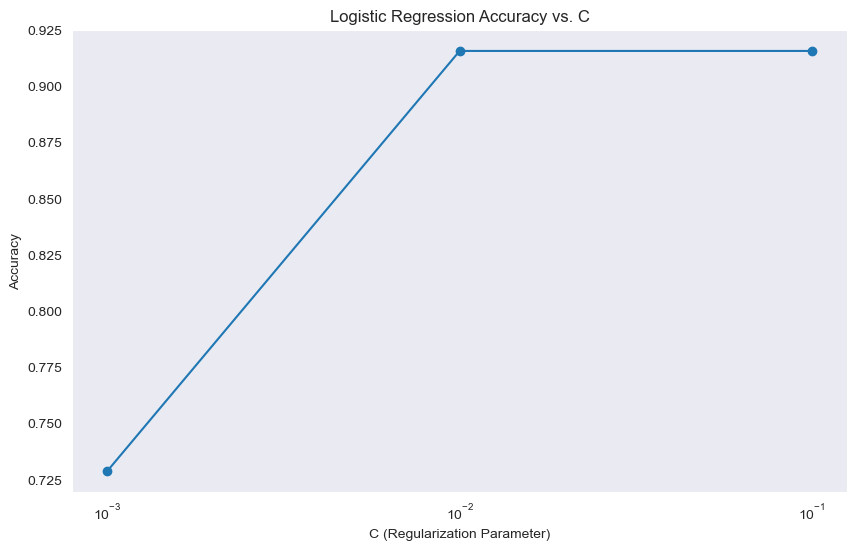

Classification report for classifier LogisticRegression(C=0.1):
                           precision    recall  f1-score   support

                 Advocate       0.67      1.00      0.80         6
                     Arts       1.00      0.60      0.75         5
       Automation Testing       0.67      0.50      0.57         4
               Blockchain       1.00      1.00      1.00         3
         Business Analyst       0.71      1.00      0.83         5
           Civil Engineer       1.00      1.00      1.00         6
             Data Science       0.83      1.00      0.91        10
                 Database       1.00      0.83      0.91         6
          DevOps Engineer       0.85      0.92      0.88        12
         DotNet Developer       1.00      1.00      1.00         4
            ETL Developer       1.00      1.00      1.00         4
   Electrical Engineering       1.00      0.83      0.91         6
                       HR       0.82      1.00      0.90        

In [96]:
C_values = [0.001, 0.01, 0.1]
accuracy_scores = []
for C in C_values:
    model_lgr = LogisticRegression(C=C)
    model_lgr.fit(x_train, y_train)
    y_pred = model_lgr.predict(x_test)
    accuracy_lgr = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy_lgr)
    print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
    print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, accuracy_scores, marker='o', linestyle='-')
plt.title("Logistic Regression Accuracy vs. C")
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

In [97]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.80
Accuracy of  test set    : 0.72
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                           precision    recall  f1-score   support

                 Advocate       1.00      0.67      0.80         6
                     Arts       1.00      0.60      0.75         5
       Automation Testing       1.00      0.50      0.67         4
               Blockchain       1.00      0.67      0.80         3
         Business Analyst       1.00      0.80      0.89         5
           Civil Engineer       0.80      0.67      0.73         6
             Data Science       0.67      1.00      0.80        10
                 Database       1.00      0.67      0.80         6
          DevOps Engineer       0.85      0.92      0.88        12
         DotNet Developer       1.00      0.25      0.40         4
            ETL Developer       1.00      1.00      1.0

Accuracy of training set : 1.00
Accuracy of  test set    : 0.95
Accuracy of training set : 1.00
Accuracy of  test set    : 0.95
Accuracy of training set : 1.00
Accuracy of  test set    : 0.95
Accuracy of training set : 1.00
Accuracy of  test set    : 0.95
Accuracy of training set : 1.00
Accuracy of  test set    : 0.93
Accuracy of training set : 1.00
Accuracy of  test set    : 0.93
Accuracy of training set : 1.00
Accuracy of  test set    : 0.93
Accuracy of training set : 1.00
Accuracy of  test set    : 0.93
Accuracy of training set : 1.00
Accuracy of  test set    : 0.93
Accuracy of training set : 1.00
Accuracy of  test set    : 0.93
Accuracy of training set : 0.98
Accuracy of  test set    : 0.89


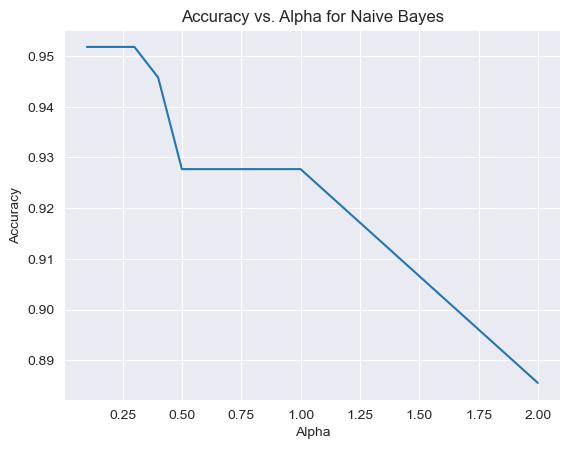

Classification report for classifier MultinomialNB(alpha=2):
                           precision    recall  f1-score   support

                 Advocate       1.00      0.67      0.80         6
                     Arts       1.00      0.60      0.75         5
       Automation Testing       0.80      1.00      0.89         4
               Blockchain       1.00      0.67      0.80         3
         Business Analyst       0.83      1.00      0.91         5
           Civil Engineer       1.00      1.00      1.00         6
             Data Science       0.77      1.00      0.87        10
                 Database       1.00      0.83      0.91         6
          DevOps Engineer       1.00      0.92      0.96        12
         DotNet Developer       1.00      0.25      0.40         4
            ETL Developer       1.00      0.75      0.86         4
   Electrical Engineering       1.00      0.83      0.91         6
                       HR       1.00      0.89      0.94         9


In [98]:
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,2]
accuracies = []

for alpha in alphas:
    model_NB =MultinomialNB(alpha=alpha)
    model_NB.fit(x_train, y_train)
    y_pred = model_NB.predict(x_test)
    accuracy_NB = accuracy_score(y_test, y_pred)
    print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
    print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
    accuracies.append(accuracy_NB)
plt.plot(alphas, accuracies)
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Alpha for Naive Bayes')
plt.show()
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

In [99]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_NB]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.930052,0.87,0.83,0.78,0.79
1,DecisionTree Classifier,1.000000,0.90,0.85,0.80,0.81
2,RandomForest Classifier,1.000000,0.92,0.90,0.87,0.87
3,SVM Classifier,0.904145,0.77,0.80,0.66,0.67
4,Logistic Regression,1.000000,0.92,0.86,0.84,0.84
5,Bagging Classifier,0.800518,0.72,0.83,0.61,0.65
6,Naive Bayes Classifier,0.979275,0.89,0.86,0.79,0.81


In [100]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
             accuracy_NB*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                
                  model_NB.score(x_train, y_train)*100]

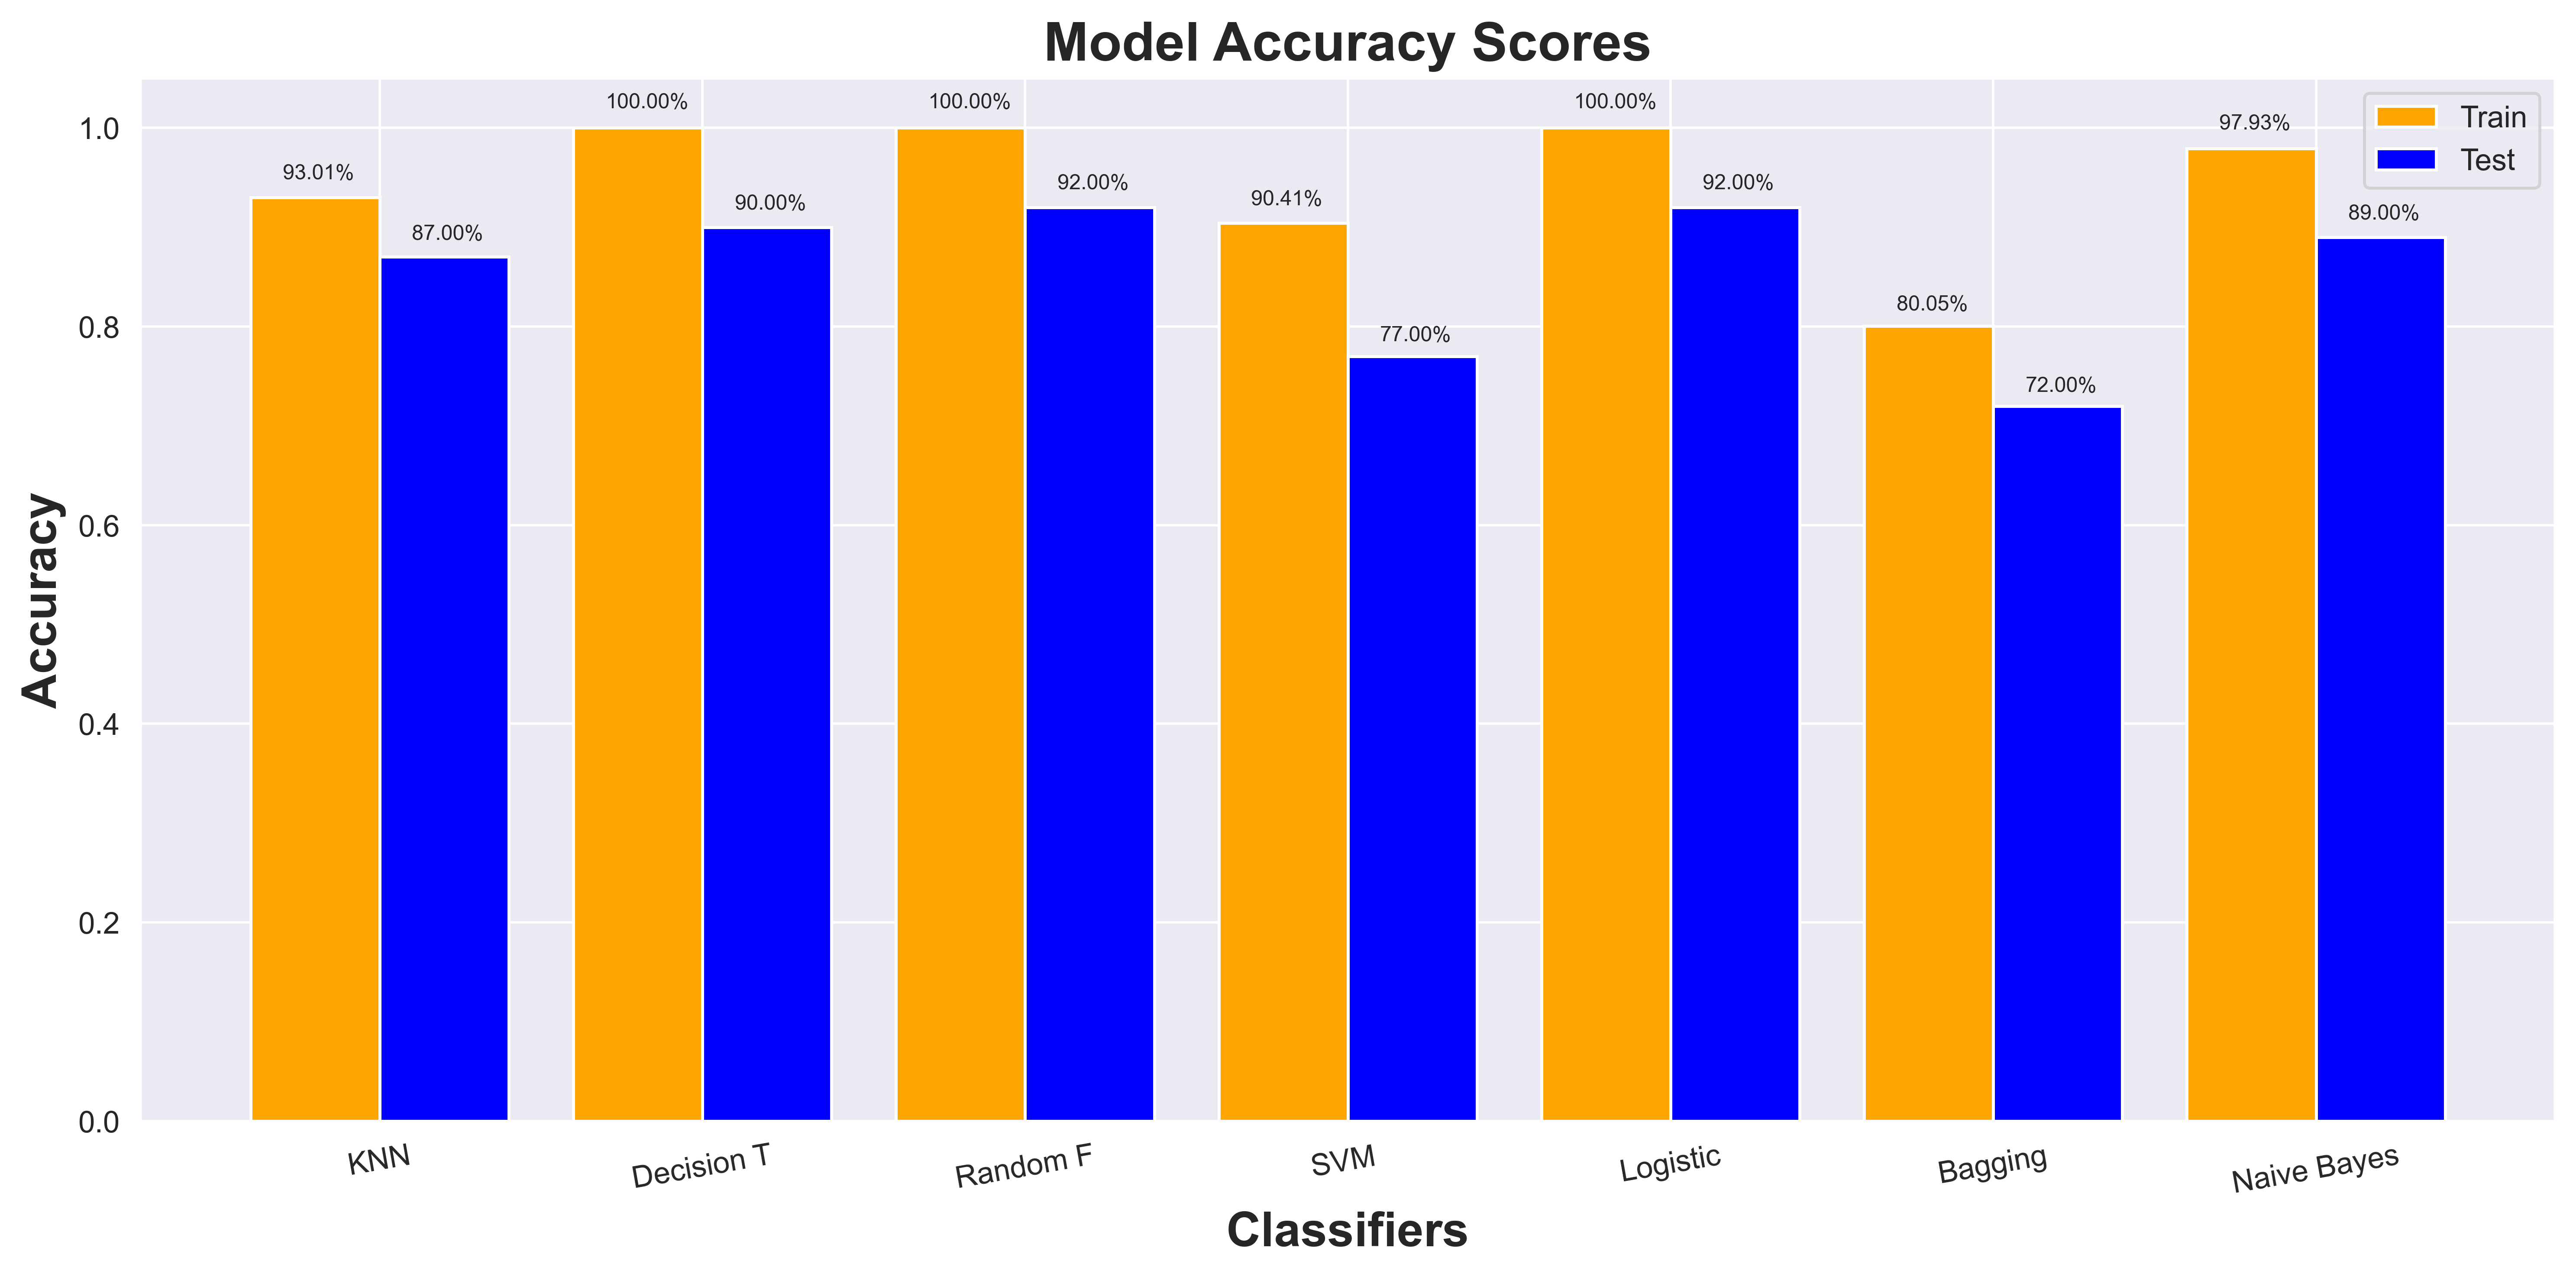

In [101]:
import matplotlib.pyplot as plt
import numpy as np

rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)
    
for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()


In [ ]:
test_resume = ["Experienced  with excellent leadership skills and a proven track record.",]
test_resume = vectorizer.transform(test_resume)
predicted_class = model_svm.predict(test_resume)

# Print the predicted class
print("Predicted class:", predicted_class[0])

# Evaluate the model's accuracy on the test set (optional)
y_pred = model_svm.predict(test_resume)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)